## Tokenizers

Tokenizers split a text into a sequence of tokens. There are different ways of doing this.

An intuitive first step towards a good tokenizer is one that simply splits a text into it's constituent words. 

#### TODO: 
- Implement a simple tokenizer that can tokenize by splitting a text on whitespaces. 
- Test it on a sample text

In [6]:
def simpletokenizer(text):
    "Split the text on whitespaces"
    return text

### Test your tokenizers on this text

In [7]:
text = 'På Grimön i den västra skärgården bodde för några år sedan en man och en hustru, som voro varandra mycket olika. \nMannen, som var omkring femton år äldre än hustrun, hade aldrig varit annat än ful, trög och senfärdig och hade inte blivit bättre på gamla dar, hustrun åter hade alltid varit nätt och lätt, och hennes lilla vackra ansikte hade bibehållit sig så väl, att hon såg närapå lika bra ut vid femtio som vid tjugu. \nDessa två makar sutto en vacker söndagskväll på en stor stenhäll, som stack upp ur marken alldeles utanför deras hus, och samspråkade i god ro. Mannen, som tyckte om att höra sin egen röst och lade sina ord väl, utbredde sig för hustrun över en artikel, som han just nyss hade läst i en tidning.\nHustrun hörde på honom med inte alltför spänd uppmärksamhet. Ack, den Joel, den Joel, tänkte hon, att han kan få ut så mycken lärdom ur ett sådant där tidningsblad! Han har verkligen ett märkvärdigt gott huvud. Det är bara synd, att han inte är i stånd att göra något bruk av det för sin och min räkning, utan bara för andras.'

simpletokenizer(text)

'På Grimön i den västra skärgården bodde för några år sedan en man och en hustru, som voro varandra mycket olika. \nMannen, som var omkring femton år äldre än hustrun, hade aldrig varit annat än ful, trög och senfärdig och hade inte blivit bättre på gamla dar, hustrun åter hade alltid varit nätt och lätt, och hennes lilla vackra ansikte hade bibehållit sig så väl, att hon såg närapå lika bra ut vid femtio som vid tjugu. \nDessa två makar sutto en vacker söndagskväll på en stor stenhäll, som stack upp ur marken alldeles utanför deras hus, och samspråkade i god ro. Mannen, som tyckte om att höra sin egen röst och lade sina ord väl, utbredde sig för hustrun över en artikel, som han just nyss hade läst i en tidning.\nHustrun hörde på honom med inte alltför spänd uppmärksamhet. Ack, den Joel, den Joel, tänkte hon, att han kan få ut så mycken lärdom ur ett sådant där tidningsblad! Han har verkligen ett märkvärdigt gott huvud. Det är bara synd, att han inte är i stånd att göra något bruk av d

### What do you see?
You should see a python list of words. If you look closely, you'll see there are some items in the list that aren't just one word. There are also special characters in some that we probably want to remove.

We could of course try to just clean up all of the items in the list, but a more sophisticated way is to use regular expressions via pythons re module:

Regex is a pattern matcher and using the re module looks like

    re.function(regex, text)

where regex is the regular expression and text the string you want to search for the pattern in. When using regexes in python, it's important to tell python that the regex is a 'raw string' by putting an 'r' before the string like this regex for finding sequences of whitespaces in text:

    r'\s+'

#### TODO: 
- Implement a tokenizer that tokenizes and removes all special characters with the python regex module 're'
    - Doc at: https://docs.python.org/3/howto/regex.html
    - Try regular expressions at https://regex101.com/  
    - Tip: There are different regexes that will solve the problem
    - Tip: a word can be described as the letters between two word boundaries
- Run the test to see that it works properly

In [8]:
import re
def regextokenizer(text):
    """This function should return a list of only words, without any special characters. 
    Fill in your regex pattern in the findall method"""
    
    return re.findall(r'regex_pattern', text)
    

### When you are done with your regextokenizer, run the cells below to check that it works properly

In [9]:
def test_tokenizer(tokens):
    assert isinstance(tokens, list), 'did not receive a list of tokens'
    assert len(tokens) != 0, 'received empty list'
    passed = 1
    if any([',' in token for token in tokens]):
        print('There are commas in your tokens. Make sure they are removed')
        passed = 0
    if any(['!' in token for token in tokens]):
        print('There are excalmation points in your tokens. Make sure they are removed')
        passed = 0
    if any(['?' in token for token in tokens]):
        print('There are question marks in your tokens. Make sure they are removed')
        passed = 0
    if any(['.' in token for token in tokens]):
        print('There are periods in your tokens. Make sure they are removed')
        passed = 0
    if any(['\n' in token for token in tokens]):
        print(r'There are newlines(\n) in your tokens. Make sure they are removed')
        passed = 0
    else:
        print('Your tokens have no special characters left!')
    return


tokens = regextokenizer(text)
test_tokenizer(tokens)

Your tokens have no special characters left!


# TF-IDF 
The TF-IDF or "Term frequency inverse document frequency" is a measure of how important a certain word is to a certain text. It can for example be used in a search engine to find documents/webpages that are relevant to your query.

You can read more about TF-IDF
- https://monkeylearn.com/blog/what-is-tf-idf/
- https://en.wikipedia.org/wiki/Tf%E2%80%93idf

Quick explanation:
- TF[word] = nbr_occurances[word] / nbr_words_in_text
- IDF[word] = log10 (nbr_documents / nbr_documents_that_contain_word)
- TF-IDF[word]: TF[word] * IDF[word] 


Hints:
- Use your tokenizer from before
- Use a dictionary to count TF


Run the cell below to read the texts by Selma Lagerlöf to a dictionary 

In [10]:
from pathlib import Path

selma_dir = Path('data/selma_lagerlof')
files = [file for file in selma_dir.iterdir() if file.suffix == '.txt']
texts = {}
for file in files:
    with open(file,'r') as f:
        text = f.read()
        texts[file.stem] = text

print('Read books:')
for title in texts.keys():
    print(' ', title)

Read books:
  bannlyst
  gosta
  herrgard
  jerusalem
  kejsaren
  marbacka
  nils
  osynliga
  troll


### You now have a dictionary where the book title maps to the text. Now you have to calculate the TF and IDF


### TF

#### TODO:
- implement the function tf()
    - You need to set the text to lowercase and tokenize it
    - The function should return a dict like object

In [11]:
from collections import Counter

def tf(text):
    # You need to tokenize the text. You can use a counter to count unique words
    # Return a dictionary like object tf_dict[word] = nbr_occurances / nbr_words
    text = text.lower()
    tokens = regextokenizer(text)
    c = Counter(tokens)
    nbr_words = len(tokens)
    tf_dict = {k: v/nbr_words for k, v in c.items()}
    
    return tf_dict


def tf_all_texts(texts):
    # Returns a nested dictionary where master_tf['title'] returns the term frequency dictionary for the book 'title'
    master_tf = {}
    for title, text in texts.items():
        master_tf[title] = tf(text)
    
    return master_tf

master_tf = tf_all_texts(texts)

### Try out your tf 

Acces the term frequency of a word in a book with 

    master_tf['title']['word']

If it works correctly, the term frequency of 'nils' in 'nils' should be  0.0003979

In [13]:
master_tf['nils']['nils']
        

0.0003979347689207908

### IDF

To create the IDF you need to know in how many documents a certain word exists. The IDF is then calculated as 

    IDF(word) = log10 (nbr_documents / nbr_documents_that_contain_word)

#### TODO:
- Complete the function idf()


In [14]:
from numpy import log10

def make_idf(master_tf):
    word_in_nbr_docs = {} # vocabulary of words
    nbr_docs = len(master_tf)
    
    # master_tf contains all the words from all the individual documents
    for title, tf in master_tf.items():
        
        for word in tf.keys():
        # We add the word to the vocabulary
            try:
                word_in_nbr_docs[word] += 1
            except KeyError:
                word_in_nbr_docs[word] = 1
    
    # word -> idf
    word_to_idf = {}
    
    for word, counts in word_in_nbr_docs.items():
        # Calculate the idf 
        word_to_idf[word] = None
        
    
    return word_to_idf   

idf = make_idf(master_tf)

### Try out your IDF

If it works properly, idf['nils'] should be ~0.2553

In [33]:
idf['av']

0.10914446942506807

### Finally it's time to compute the TF-IDF from our TF and IDF values

We want a nested dictionary so we can look up the TF-IDF for a certain word as tfidf[word][text]

TODO:
- implement make_tfidf()

Hints:
- It should have the same structure as master_tf object. 


In [24]:
from copy import deepcopy

def make_tfidf(master_tf, word_to_idf):
    
    # Use if you want. You need to go through the tfidf and update all the values
    tfidf = deepcopy(master_tf)
    
    for title, tf in master_tf.items():
        
        # Fill in your code
        for word, tf_value in tf.items():
            tfidf[title][word] = tf_value * idf[word]
        
    
    return tfidf

tfidf = make_tfidf(master_tf, idf)

## Testing your TF-IDF

You now have a TF-IDF table that you can use to get values from different texts. Use it to compare the values of different words between the different texts.


#### TODO:
Here's a list of words you can try:
+ nils
+ och
+ värmland
+ troll
+ pojke

    
    
What conclusions can you draw from your results?


In [29]:
tfidf['nils']

{'selma': 0.0,
 'lagerlöf': 0.0,
 'nils': 0.0001015818053301155,
 'holgerssons': 2.883997006238987e-05,
 'underbara': 6.2089853337855115e-06,
 'resa': 0.0,
 'genom': 0.0,
 'sverige': 1.7592862468717684e-05,
 'första': 0.0,
 'bandet': 9.870986230076974e-06,
 'bokutgåva': 0.0,
 'albert': 0.0,
 'bonniers': 0.0,
 'förlag': 0.0,
 'stockholm': 0.0,
 '1907': 9.613323354129958e-06,
 'den': 0.0,
 'kristliga': 9.613323354129958e-06,
 'dagvisan': 9.613323354129958e-06,
 'signade': 3.2903287433589915e-06,
 'dag': 0.0,
 'som': 0.0,
 'vi': 0.0,
 'nu': 0.0,
 'här': 0.0,
 'se': 0.0,
 'av': 0.0007911290341401484,
 'himmelen': 5.497769521474276e-06,
 'till': 0.0,
 'oss': 0.0,
 'nedkomma': 3.2903287433589915e-06,
 'han': 0.0,
 'blive': 4.806661677064979e-06,
 'säll': 2.4033308385324896e-06,
 'låte': 3.2903287433589915e-06,
 'sig': 0.0,
 'te': 5.153257518940314e-07,
 'alla': 0.0,
 'glädje': 0.0,
 'och': 0.0,
 'fromma': 3.5479916193060067e-06,
 'ja': 0.0,
 'herren': 1.2858456370900698e-06,
 'högste': 1.773

#### TODO:

- Find the words with the highest tfidf values in the texts. Do they make sense?

In [20]:
from numpy import argmax

def k_most_specific_words(title, k):
    c = Counter(tfidf[title])
    return c.most_common(k)
    
    

In [32]:
k_most_specific_words('gosta', 10)

[('gösta', 0.0023065985184732123),
 ('grevinnan', 0.0011532992592366061),
 ('berling', 0.0009610827160305051),
 ('av', 0.0009559100089808572),
 ('kavaljererna', 0.0008750911045961968),
 ('ekeby', 0.0007745309994395594),
 ('marianne', 0.0006525245808838692),
 ('majorskan', 0.0006281022588770182),
 ('över', 0.0004580930370182358),
 ('sintram', 0.0003894914164965731)]

# Word embeddings

To become familiar with word embeddings we'll use the gensim library. We'll download pretrained word2vec embeddings trained on google news.

The gensim library provides functions for playing around with the word embeddings such as comparing how similar two words are, listing the most similar words and more

##### TODO:

Play around with the different functions and get a feel for how you can query a word

In [46]:
import gensim
import gensim.downloader as api
wv = api.load('word2vec-google-news-300') 

### How similar are two words

Which companies have the highest pairwise similarity according to the word embeddings: Google, Facebook, Apple and Microsoft? Compare them and see!

Tip: use itertools to construct all of the combinations so you don't have to do it manually

In [37]:
import itertools
companies = ['google', 'facebook', 'microsoft', 'apple']
combinations = None

word1 = 'google'
word2 = 'facebook'

print(f'Similarity between {word1} and {word2} is {wv.similarity(word1,word2)}')

Similarity between google and facebook is 0.5005902647972107


### List the most similar words

We can query the most similar words to a certain word. Do you think they are reasonable?

In [38]:
word = 'google'
wv.similar_by_word(word, topn=10)

[('google.com', 0.6711485981941223),
 ('google_yahoo', 0.6488178968429565),
 ('wikipedia', 0.6436079740524292),
 ('www.google.com', 0.6258558630943298),
 ('googled', 0.6166062951087952),
 ('googling', 0.6086059212684631),
 ('slashdot', 0.5964587926864624),
 ('lifehacker', 0.5948860049247742),
 ('gizmodo', 0.5884420275688171),
 ('inurl', 0.5882638096809387)]

### Similar to X like Y to Z

We can query that a word should be positively similar to certain words, but not similar to other words. 

We can use this to query an answer to the following question:
"A king is to a man what a woman is to a ..."

Can you find other examples where a word should be similar to certain words but not to other to find the answer you're looking for?

In [39]:
wv.most_similar(positive=["man", "queen"], negative=["king"], topn=1)

[('woman', 0.7609436511993408)]

### You can also try to use basic linear math operators to construct a vector and check what word it is closest to

In [40]:
new_word = wv['tiger'] - wv['cat'] + wv['dog']
wv.most_similar(positive=[new_word], topn=5)

[('tiger', 0.8426185846328735),
 ('tigers', 0.6714946031570435),
 ('dog', 0.574916660785675),
 ('elephants', 0.5681689381599426),
 ('elephant', 0.5566478371620178)]

### Similar to X but not Y

Some words are ambiguous - Apple can be both a tech company and a fruit. What if you want to find similar words to just the fruit? Or just the company? With the 'negative' argument you can specify a word you don't want it to be similar to.

Can you find other examples of ambiguous words?

In [43]:
wv.most_similar(positive=["apple"], negative=["fruit", 'company'], topn=10)

[('jta', 0.6132248640060425),
 ("o'brien", 0.6043553948402405),
 ('whitney', 0.6021254658699036),
 ('rodney', 0.5938031077384949),
 ('curtis', 0.5878811478614807),
 ('alexander', 0.587669312953949),
 ('jonny', 0.5851280689239502),
 ('quinn', 0.5809890627861023),
 ('craig', 0.5809204578399658),
 ('dave', 0.5806783437728882)]

### Find the odd one out

In [26]:
words = "apple pear fruit bear " # Separate the words by a space
print(wv.doesnt_match(words.split()))

bear


## Plot embeddings

The embeddings we've used have the dimension 300, i.e. every word is represented by 300 values. In a mathematical sense, they exist in an "abstract room" with 300 dimensions. It's in this room that we compare how similar words are by computing distances and angles between words.

Obviously we can't visualise something in 300 dimensions. But there are mathematical tricks for reducing the dimensions that we can use to then plot the points in 2D(or 3D). Here we'll use an algorithm called TSNE to plot words similar to a target word.

In [44]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

target_word = "mario"
selected_words = [w[0] for w in wv.most_similar(positive=[target_word], topn=50)] + [target_word]
embeddings = [wv[w] for w in selected_words] + wv[target_word]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

C:\Users\AlexanderHagelborn\Miniconda3\envs\testenv\lib\site-packages\scikit_learn-0.24.1-py3.8-win-amd64.egg\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


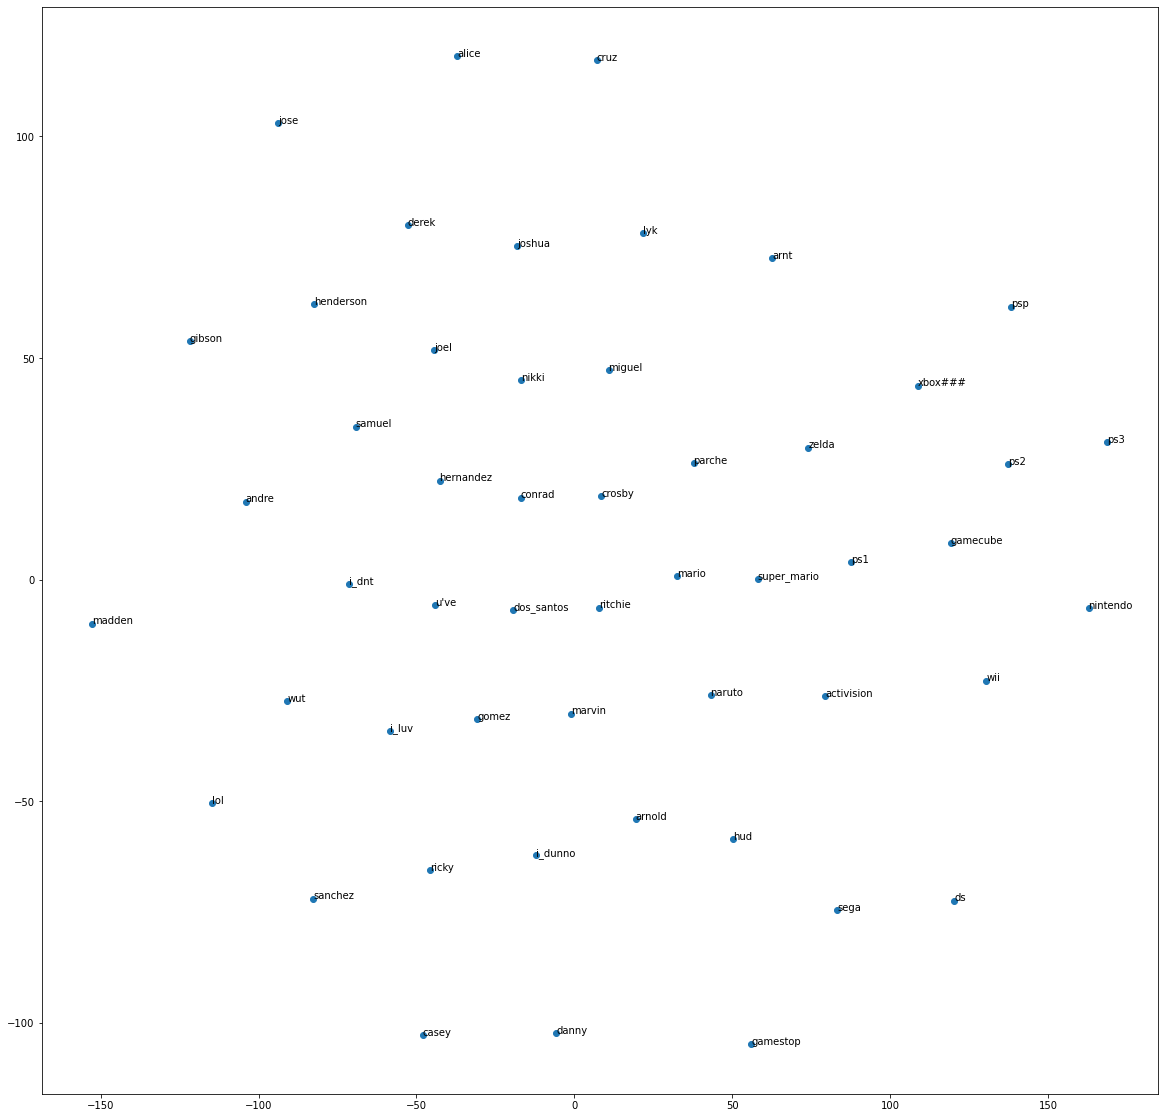

In [45]:
plt.figure(figsize=(20,20))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))